In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1 - Importação das bibliotecas

In [2]:
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# 2 - Importação da base de dados

In [3]:
PATH = '/content/drive/MyDrive/Colab Notebooks/Machine Learning e Data Science com Python de A a Z/Estudo regressao/house_prices.csv'
base = pd.read_csv(PATH)
base.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# 3 - Processamento e Modelo linear

## 3.1 - Selecionando as colunas e separando o dataset

In [4]:
X = base.iloc[:, 5:6].values
y = base.iloc[:, 2].values

In [5]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size = 0.3, random_state = 0)
print('Tamanho X de treinamento: ', X_treinamento.shape[0])
print('Tamanho X de teste:       ', X_teste.shape[0])
print('Tamanho y de treinamento: ', y_treinamento.shape[0])
print('Tamanho y de teste:       ', y_teste.shape[0])

Tamanho X de treinamento:  15129
Tamanho X de teste:        6484
Tamanho y de treinamento:  15129
Tamanho y de teste:        6484


## 3.2 - Criando o modelo e analizando os resultados

In [6]:
regressor = LinearRegression()
regressor.fit(X_treinamento, y_treinamento)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
score = regressor.score(X_treinamento, y_treinamento)
score

0.49453356717789776

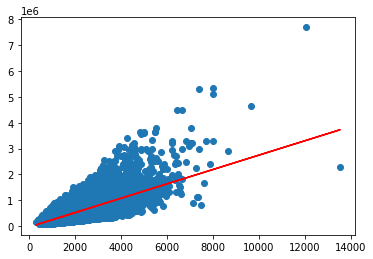

In [8]:
plt.scatter(X_treinamento, y_treinamento)
plt.plot(X_treinamento, regressor.predict(X_treinamento), color = 'red')
plt.show()

In [9]:
previsoes = regressor.predict(X_teste)
previsoes

array([ 360116.30871034, 1261900.99358095,  362899.59477476, ...,
        560512.90534826,  374032.73903242,  329500.16200177])

In [10]:
resultado = abs(y_teste - previsoes)
resultado

array([ 63116.30871034, 316099.00641905, 199200.40522524, ...,
       180512.90534826, 106032.73903242, 123500.16200177])

In [11]:
# A média de erro do modelo
resultado.mean()

172604.1288999542

In [12]:
mae = mean_absolute_error(y_teste, previsoes)
mae

172604.1288999542

In [13]:
mse = mean_squared_error(y_teste, previsoes)
mse

70170013932.1159

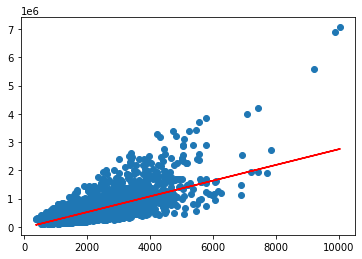

In [14]:
plt.scatter(X_teste, y_teste)
plt.plot(X_teste, regressor.predict(X_teste), color = 'red')
plt.show()

# 4 - Processamento e Modelo não linear

## 4.1 - Selecionando as colunas e separando o dataset

In [15]:
X = base.iloc[:, 3:19].values
y = base.iloc[:, 2].values

In [16]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size = 0.3, random_state = 0)
print('Tamanho X de treinamento: ', X_treinamento.shape[0])
print('Tamanho X de teste:       ', X_teste.shape[0])
print('Tamanho y de treinamento: ', y_treinamento.shape[0])
print('Tamanho y de teste:       ', y_teste.shape[0])

Tamanho X de treinamento:  15129
Tamanho X de teste:        6484
Tamanho y de treinamento:  15129
Tamanho y de teste:        6484


## 4.2 - Criando o modelo e analizando os resultados

In [17]:
regressor = LinearRegression()
regressor.fit(X_treinamento, y_treinamento)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
score = regressor.score(X_treinamento, y_treinamento)
score

0.7029888085955007

In [19]:
previsoes = regressor.predict(X_teste)

In [20]:
mae = mean_absolute_error(y_teste, previsoes)
mae

123888.44377485772

## 4.3 - Criando o modelo de regressão polinomial

In [21]:
poly = PolynomialFeatures(degree=2)

In [22]:
X_treinamento_poly = poly.fit_transform(X_treinamento)

In [23]:
X_treinamento_poly

array([[ 1.00000000e+00,  4.00000000e+00,  1.50000000e+00, ...,
         2.27742746e+03, -5.83797664e+03,  1.49651182e+04],
       [ 1.00000000e+00,  3.00000000e+00,  1.50000000e+00, ...,
         2.28221176e+03, -5.84491760e+03,  1.49692778e+04],
       [ 1.00000000e+00,  5.00000000e+00,  2.75000000e+00, ...,
         2.27607235e+03, -5.82536205e+03,  1.49093868e+04],
       ...,
       [ 1.00000000e+00,  3.00000000e+00,  2.25000000e+00, ...,
         2.24539509e+03, -5.78853012e+03,  1.49225770e+04],
       [ 1.00000000e+00,  4.00000000e+00,  2.00000000e+00, ...,
         2.23569155e+03, -5.78173018e+03,  1.49521538e+04],
       [ 1.00000000e+00,  4.00000000e+00,  2.25000000e+00, ...,
         2.26695968e+03, -5.81445071e+03,  1.49132944e+04]])

In [24]:
X_teste_poly = poly.transform(X_teste)

In [25]:
regressor_RP = LinearRegression()

In [26]:
regressor_RP.fit(X_treinamento_poly, y_treinamento)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
score = regressor_RP.score(X_treinamento_poly, y_treinamento)
score

0.817937209116416

In [28]:
previsoes_RP = regressor_RP.predict(X_teste_poly)

In [29]:
mae = mean_absolute_error(y_teste, previsoes_RP)
mae

101225.53413948139

## 4.4 - Criando um modelo de regressão usando árvore de decisão

In [30]:
regressor_DT = DecisionTreeRegressor()

In [31]:
regressor_DT.fit(X_treinamento, y_treinamento)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [32]:
score = regressor_DT.score(X_treinamento, y_treinamento)
score

0.9992712177726063

In [33]:
previsoes_DT = regressor_DT.predict(X_teste)

In [34]:
mae_DT = mean_absolute_error(y_teste, previsoes_DT)
mae_DT

98619.40607649599

In [35]:
regressor_DT.score(X_teste, y_teste)

0.7273929269070663

## 4.5 - Criando um modelo de regressão utilizando Random Forest


In [36]:
regressor_RF = RandomForestRegressor(n_estimators=100)

In [37]:
regressor_RF.fit(X_treinamento, y_treinamento)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [38]:
score = regressor_RF.score(X_treinamento, y_treinamento)
score

0.9808514852652367

In [39]:
previsoes_RF = regressor_RF.predict(X_teste)

In [40]:
mae_RF = mean_absolute_error(y_teste, previsoes_RF)
mae_RF

67983.01586376232

In [41]:
regressor_RF.score(X_teste, y_teste)

0.880085518275648